<a href="https://colab.research.google.com/github/zachparker2014/Zachary-Parker-IntrotoMachineLearning/blob/main/ParkerHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
breastCancer = load_breast_cancer()

In [7]:
breastCancer.target.size

569

In [12]:
breastCancer.data.size

17070

In [13]:
breastCancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
breastCancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
print(breastCancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [17]:
breastCancer.data.shape

(569, 30)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breastCancer.data, breastCancer.target, random_state=11)

In [19]:
X_train.shape

(426, 30)

In [21]:
X_test.shape

(143, 30)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [26]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [34]:
predicted = knn.predict(X=X_test)
expected = y_test

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(wrong)
print(len(wrong))
print(len(X_test))

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]
8
143


In [35]:
#Estimator Method Score
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [39]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

[[43  7]
 [ 1 92]]


array([[43,  7],
       [ 1, 92]])

In [42]:
from sklearn.metrics import classification_report
names = [str(breastCancer) for breastCancer in breastCancer.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



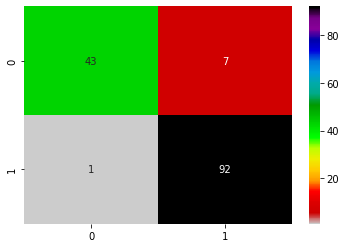

In [44]:
import seaborn as sns
confusion_df = pd.DataFrame(confusion)
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [47]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=breastCancer.data, 
    y=breastCancer.target, cv=kfold)

In [48]:
print(scores)
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

[0.92982456 0.94736842 0.89473684 0.92982456 0.92982456 0.94736842
 0.89473684 0.94736842 0.94736842 0.91071429]
Mean accuracy: 92.79%
Accuracy standard deviation: 2.01%


In [58]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
estimators = {'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [60]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=breastCancer.data, y=breastCancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
